In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *

d

### Create ICA object

In [2]:
tpm = pd.read_csv('../data/ICA_data/log_tpm_norm.csv',index_col='gene_id')
#gene_table = pd.read_csv('../data/Annotations/yarrowia_NCBI_table.csv',index_col='Locus tag')
sample_table = pd.read_table('../data/ICA_data/metadata.tsv',index_col='ID')
A = pd.read_csv('../data/ICA_data/A.csv',index_col='Unnamed: 0')
M = pd.read_csv('../data/ICA_data/M.csv',index_col='gene_id')
M.index = [w.replace('gene-','') for w in M.index]
tpm.index = [w.replace('gene-','') for w in tpm.index]
TRN = pd.read_csv('../data/Annotations/yarrowiaTRN.csv',index_col = 'Unnamed: 0')


In [3]:
'''
Generate gene table
'''

from pymodulon.gene_util import *

yl_gene_table = gff2pandas('../data/Sequences/W29.gff',index='locus_tag')
bbh_results = pd.read_csv('../data/blast/bbh/homologue_maps.csv',index_col='Unnamed: 0')

bbh_results = bbh_results.rename(columns={'subject':'locus_tag'}) 
bbh_results = bbh_results[['gene','locus_tag','PID','COV','BBH','sacc_gene_name', 'sacc_gene_product']]


In [4]:
yl_gene_table = yl_gene_table.merge(bbh_results, on='locus_tag', how='left').set_index('locus_tag')


In [5]:
yl_gene_table

,accession,source,feature,start,end,score,strand,phase,attributes,gene_name,gene_product,ncbi_protein,old_locus_tag,gene,PID,COV,BBH,sacc_gene_name,sacc_gene_product
locus_tag,,,,,,,,,,,,,,,,,,,
YALI1_E00019g,NC_090774.1,RefSeq,CDS,1745.0,1966.0,.,-,0,ID=cds-XP_068138982.1;Parent=rna-XM_068282881....,None,uncharacterized protein,XP_068138982.1,None,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A00019g,NC_090770.1,RefSeq,CDS,1806.0,1963.0,.,-,2,ID=cds-XP_068137694.1;Parent=rna-XM_068281593....,None,uncharacterized protein,XP_068137694.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A00032g,NC_090770.1,RefSeq,CDS,3285.0,3920.0,.,+,0,ID=cds-XP_068137695.1;Parent=rna-XM_068281594....,None,uncharacterized protein,XP_068137695.1,None,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_D00040g,NC_090773.1,RefSeq,CDS,3558.0,4058.0,.,-,0,ID=cds-XP_068138650.1;Parent=rna-XM_068282549....,None,uncharacterized protein,XP_068138650.1,None,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_E00040g,NC_090774.1,RefSeq,CDS,3622.0,4079.0,.,-,2,ID=cds-XP_068138983.1;Parent=rna-XM_068282882....,None,uncharacterized protein,XP_068138983.1,YALI2_E01769g,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YALI1_E41699g,NC_090774.1,RefSeq,CDS,4167841.0,4169940.0,.,-,0,ID=cds-XP_504799.1;Parent=rna-XM_504799.1;Dbxr...,None,uncharacterized protein,XP_504799.1,YALI2_F00486g,YOR384W,28.447,0.992795,->,FRE5,putative ferric-chelate reductase
YALI1_E41737g,NC_090774.1,RefSeq,CDS,4173760.0,4174392.0,.,+,0,ID=cds-XP_068139298.1;Parent=rna-XM_068283197....,None,uncharacterized protein,XP_068139298.1,None,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_E41754g,NC_090774.1,RefSeq,CDS,4175470.0,4175676.0,.,+,0,ID=cds-XP_504800.3;Parent=rna-XM_504800.3;Dbxr...,None,uncharacterized protein,XP_504800.3,YALI2_F00479g,NaN,NaN,NaN,NaN,NaN,NaN


### Get COG categories

In [6]:
from Bio import Entrez, SeqIO
import pandas as pd

Entrez.email = "kkrishnan@ucsd.edu"

def fetch_protein_fasta(accession):
    try:
        handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
        return handle.read()
    except:
        return None

# # Extract unique protein accessions from your dataframe
# protein_ids = yl_gene_table['ncbi_protein'].dropna().unique()

# # Download protein sequences to a file for eggNOG-mapper
# with open("yarrowia_proteins.faa", "w") as out_f:
#     for acc in protein_ids:
#         fasta = fetch_protein_fasta(acc)
#         if fasta:
#             out_f.write(fasta)


### Map COGs

In [7]:
cogs = pd.read_csv('../data/eggnog/eggnog.tsv', sep='\t', skiprows=4)  # Skip the 3 `##` lines + 1 blank
cogs = cogs[['#query','COG_category','Description','Preferred_name','GOs','PFAMs','KEGG_Pathway','KEGG_Module','BRITE']]
cogs = cogs.rename(columns={'#query':'locus_tag'})

yl_gene_table = yl_gene_table.merge(cogs, on='locus_tag', how='left').set_index('locus_tag')


MAP CLB to W29 genes

In [8]:
from compare_genomes import reciprocal_best_hits

from Bio import SeqIO

def extract_proteins_from_gbff(gbff_path, output_fasta):
    with open(output_fasta, "w") as out_f:
        for record in SeqIO.parse(gbff_path, "genbank"):
            for feature in record.features:
                if feature.type == "CDS" and "translation" in feature.qualifiers:
                    protein_seq = feature.qualifiers["translation"][0]
                    gene_id = feature.qualifiers.get("locus_tag", ["unknown"])[0]
                    out_f.write(f">{gene_id}\n{protein_seq}\n")

# Example usage:
#extract_proteins_from_gbff("../data/Sequences/CLIB122.gbff", "CLIB122_proteins.faa")
#extract_proteins_from_gbff("../data/Sequences/W29.gbff", "W29_proteins.faa")

#df = reciprocal_best_hits("genomeA_proteins.faa", "genomeB_proteins.faa")

In [9]:
# df = reciprocal_best_hits("CLIB122_proteins.faa", "W29_proteins.faa")

# df

In [10]:
#df.to_csv('cl_w29_protein_maps.tsv',sep='\t')

df = pd.read_csv('cl_w29_protein_maps.tsv',sep='\t',index_col=0)
df


,gene_a,gene_b,score_a2b,score_b2a
0,YALI0_A00110g,YALI1_A00058g,1792.0,1792.0
1,YALI0_A00132g,YALI1_A00102g,1241.0,1241.0
2,YALI0_A00154g,YALI1_A00148g,748.0,748.0
3,YALI0_A00176g,YALI1_A00204g,259.0,259.0
4,YALI0_A00198g,YALI1_A00241g,521.0,521.0
...,...,...,...,...
6330,YALI0_F32021g,YALI1_F39645g,798.0,798.0
6331,YALI0_F32043g,YALI1_F39665g,3800.0,3800.0
6332,YALI0_F32065g,YALI1_F39789g,1226.0,1226.0
6333,YALI0_F32153g,YALI1_F39885g,2247.0,2247.0


Create a new TRN mapping



In [11]:
trn = pd.read_csv('../data/Annotations/yarrowiaTRN.csv',index_col='Unnamed: 0')

gene_map = []
for gene in trn['gene_id'].tolist():
    if(df[df['gene_a']==gene].shape[0]>0):
        gene_map.append(df[df['gene_a']==gene]['gene_b'].tolist()[0])
    else:
        gene_map.append('NA')   

trn['W29_gene_map'] = gene_map
trn = trn[['regulator','W29_gene_map']].rename(columns={'W29_gene_map':'gene_id'})




In [12]:
tpm

,yl_001,yl_002,yl_003,yl_004,yl_005,yl_006,yl_007,yl_008,yl_009,yl_010,...,yl_091,yl_092,yl_093,yl_094,yl_095,yl_096,yl_097,yl_098,yl_099,yl_100
YALI1_A00014g,1.109457,1.084729,1.762076,1.793261,-0.281360,0.281360,1.448052,0.577091,0.131757,0.532823,...,0.307781,-0.159176,-0.219135,0.219135,-0.325667,-0.149281,-0.394077,0.246851,-0.880095,-0.521728
YALI1_A00019g,1.137420,1.015693,-0.077203,0.234664,-0.266550,0.266550,0.841682,-0.036298,1.099453,-0.085316,...,0.496828,0.291401,-0.322892,0.322892,-0.141931,0.065655,-0.209501,-0.440878,-0.154114,-0.687807
YALI1_A00032g,1.885656,1.766605,2.649679,2.995674,-0.097919,0.097919,0.458335,0.728875,-0.097919,0.148130,...,0.407229,0.045759,0.139209,-0.139209,0.008555,-0.325778,-0.269450,0.173465,0.295169,-0.603640
YALI1_A00058g,0.346967,0.496918,1.478384,1.593532,0.077185,-0.077185,-0.138750,-0.229054,-0.244924,-0.188196,...,1.539186,0.639878,0.819535,-0.819535,-0.667892,-0.908131,-0.828855,-0.251137,-0.041740,0.826072
YALI1_A00102g,-2.880998,-3.054356,-2.556581,-2.648829,0.095809,-0.095809,0.137018,0.879338,0.318618,0.937818,...,0.167583,0.034936,0.272812,-0.272812,-0.344441,-0.114816,-0.086786,-0.323532,-0.160789,0.086213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YALI1_F39818g,-1.648109,-0.517872,-0.323115,-0.474192,-0.196103,0.196103,-1.865854,-1.684984,-2.372866,-2.594044,...,-0.373448,0.192278,-0.321967,0.321967,0.637289,-0.230103,0.039422,-0.198681,-0.515350,0.485664
YALI1_F39844g,-0.408683,-0.144208,-0.637249,-0.433374,-0.211683,0.211683,-0.899901,-1.491036,-1.491036,-1.491036,...,-0.158214,-0.756281,-0.414095,0.414095,-0.107678,-0.489201,0.073731,-0.578705,-0.334350,-0.163633
YALI1_F39885g,-0.309660,-0.154164,-0.440823,-0.404765,-0.016738,0.016738,-0.380975,0.133012,-0.259172,-0.194627,...,0.378419,0.039954,0.266412,-0.266412,-0.199110,-0.033261,-0.296500,-0.416566,-0.223868,-0.348707
YALI1_F39891g,-1.512208,-1.080185,-1.252395,-1.214795,-0.165545,0.165545,-0.752363,-0.497684,-0.614920,-0.597422,...,0.459530,0.114346,0.374993,-0.374993,-0.176499,-0.066118,-0.289203,0.024034,0.260076,-0.644479


### Create ICA data object

In [13]:
from pymodulon.core import IcaData

ica_data = IcaData(M,A,trn=trn,threshold_method='dagostino')

ica_data.gene_table = yl_gene_table
ica_data.X = tpm
ica_data.sample_table = sample_table


Perform regulon enrichments


In [14]:
from enrichment import *

imod_table = pd.DataFrame()
sacc_enrich = []

for imod in ica_data.M.columns:
    enrichs = compute_trn_enrichment(
        ica_data.view_imodulon(imod).index.tolist(),
        ica_data.gene_names,
        trn
    )

    if not enrichs.empty:
        ser = enrichs.iloc[0]              # first row as a Series
        imod_table[imod] = ser             # scores → column
        sacc_enrich.append(ser.name)       # row label → list
    else:
        # keep the column but fill with NaN so shapes stay consistent
        imod_table[imod] = pd.Series(
            np.nan,
            index=imod_table.index,        # match existing index (may be empty the first time)
            dtype=float
        )
        sacc_enrich.append('N.A')          # or np.nan if you prefer

# imod_table  → columns = imod IDs, index = TFs (union over all Series)
# sacc_enrich → list of first-row labels (or 'N.A' for empty enrichs)


In [15]:
imod_table.loc['Yeast_TF',:] = sacc_enrich

imod_table.to_csv('yeast_enrichments.tsv',sep='\t')

In [16]:
enrichment_details = imod_table.copy(deep=False)

enrichment_details

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
pvalue,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.000156,NaN,0.00006,NaN,NaN,NaN,NaN,NaN
precision,0.045802,NaN,NaN,NaN,0.04878,NaN,0.0625,NaN,NaN,NaN,...,NaN,NaN,0.046296,NaN,0.039474,NaN,NaN,NaN,NaN,NaN
recall,0.3,NaN,NaN,NaN,0.259259,NaN,0.3125,NaN,NaN,NaN,...,NaN,NaN,0.125,NaN,0.333333,NaN,NaN,NaN,NaN,NaN
f1score,0.07947,NaN,NaN,NaN,0.082111,NaN,0.104167,NaN,NaN,NaN,...,NaN,NaN,0.067568,NaN,0.070588,NaN,NaN,NaN,NaN,NaN
TP,6.0,NaN,NaN,NaN,14.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
regulon_size,20.0,NaN,NaN,NaN,54.0,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,40.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
gene_set_size,131.0,NaN,NaN,NaN,287.0,NaN,80.0,NaN,NaN,NaN,...,NaN,NaN,108.0,NaN,76.0,NaN,NaN,NaN,NaN,NaN
n_regs,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
qvalue,0.000032,NaN,NaN,NaN,0.0,NaN,0.000015,NaN,NaN,NaN,...,NaN,NaN,0.007648,NaN,0.004417,NaN,NaN,NaN,NaN,NaN
Yeast_TF,DAL81,N.A,N.A,N.A,ADR1,N.A,SWI5,N.A,N.A,N.A,...,N.A,N.A,RTG3,N.A,HOT1,N.A,N.A,N.A,N.A,N.A


In [17]:
def compute_row_threshold(row, percentile=99.75, min_count=100):
    """
    Given a Pandas Series (one row of data), compute a threshold T with these rules:
      1. Let abs_vals = sorted absolute values of `row`.
      2. Let T_perc = np.percentile(abs_vals, percentile).
      3. Count how many entries satisfy |value| > T_perc:
           count_above = sum(abs_vals > T_perc).
         - If count_above < min_count, return T_perc.
         - Otherwise, return the (min_count)-th largest absolute value.
    """
    abs_vals = np.abs(row.values)
    
    # 1) Find the X-th percentile threshold of abs_vals:
    T_perc = np.percentile(abs_vals, percentile)
    
    # 2) How many entries are strictly greater than that percentile?
    count_above = np.sum(abs_vals > T_perc)
    
    if count_above < min_count:
        return T_perc
    else:
        # Sort descending, then take the (min_count)-th entry
        sorted_desc = np.sort(abs_vals)[::-1]
        # If there are at least min_count entries, pick that one.
        if len(sorted_desc) >= min_count:
            return sorted_desc[min_count-1]
        else:
            # In the rare case that the row has fewer than min_count entries,
            # we just pick the smallest absolute value (i.e. the last one in sorted_desc).
            return sorted_desc[-1]
        
        
thresholds = ica_data.M.T.apply(compute_row_threshold,
                    axis=1)

In [18]:
### Plot COG categories

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

majority_cogs = []
second_majority_cogs = []
majority_counts = []
second_majority_counts = []
imodulon_cog_df = pd.DataFrame({'imodulon': list(range(ica_data.M.shape[1]))})
imodulon_cog_df['majority_cog'] = None
imodulon_cog_df['second_majority_cog'] = None
imodulon_cog_df['majority_count'] = 0
imodulon_cog_df['second_majority_count'] = 0
# Create a list of all imodulon IDs 
all_imodulon_ids = range(ica_data.M.shape[1])
# Iterate through each imodulon and compute the majority and second majority COG categories                 
for imod_id in all_imodulon_ids:
    imod_df = ica_data.view_imodulon(imod_id)
    cogs = imod_df['COG_category'].dropna()
    cog_counts = Counter(cogs)
    if len(cog_counts) == 0:
        majority_counts.append(0)
        second_majority_counts.append(0)
        majority_cogs.append(None)
        second_majority_cogs.append(None)
        continue
    most_common = cog_counts.most_common(2)
    majority_counts.append(most_common[0][1])
    second_majority_counts.append(most_common[1][1] if len(most_common) > 1 else 0)
    majority_cogs.append(most_common[0][0])
    second_majority_cogs.append(most_common[1][0] if len(most_common) > 1 else None)

imodulon_cog_df['majority_count'] = majority_counts
imodulon_cog_df['second_majority_count'] = second_majority_counts
imodulon_cog_df['majority_cog'] = majority_cogs
imodulon_cog_df['second_majority_cog'] = second_majority_cogs
# Display the updated DataFrame for inspection
imodulon_cog_df[['imodulon', 'majority_cog', 'majority_count', 'second_majority_cog', 'second_majority_count']].head()


,imodulon,majority_cog,majority_count,second_majority_cog,second_majority_count
0,0,E,25,S,14
1,1,S,10,G,8
2,2,C,12,H,2
3,3,None,0,None,0
4,4,I,33,S,31


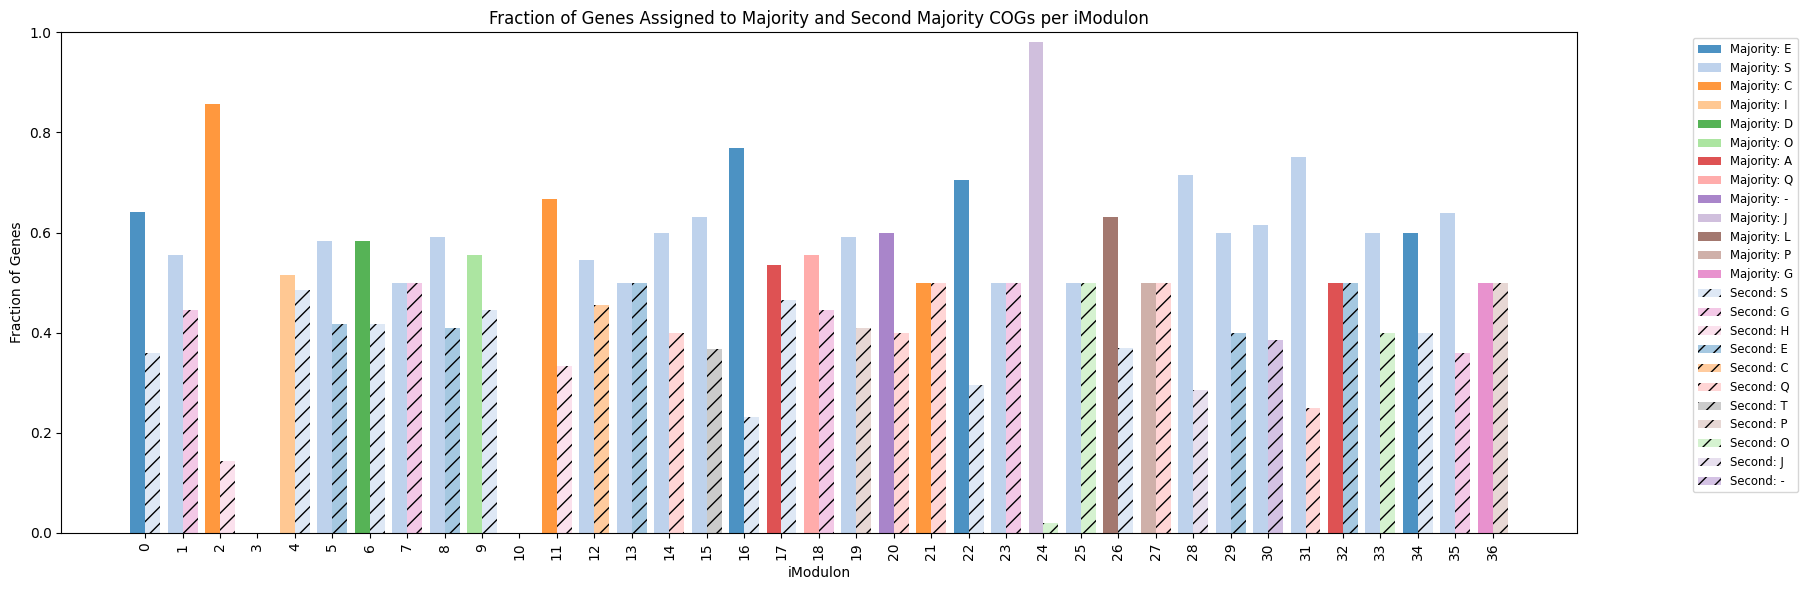

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
plot_df = imodulon_cog_df.copy()
plot_df['imodulon'] = plot_df['imodulon'].astype(int)
plot_df = plot_df.sort_values('imodulon')
plot_df['imodulon'] = plot_df['imodulon'].astype(str)

# Calculate total gene count per iModulon
plot_df['total_count'] = plot_df['majority_count'] + plot_df['second_majority_count']

# Compute fraction
plot_df['majority_fraction'] = plot_df['majority_count'] / plot_df['total_count']
plot_df['second_majority_fraction'] = plot_df['second_majority_count'] / plot_df['total_count']

# Get unique COGs from both columns
all_cogs = pd.unique(plot_df[['majority_cog', 'second_majority_cog']].values.ravel('K'))
all_cogs = [c for c in all_cogs if pd.notnull(c)]
cog_palette = dict(zip(all_cogs, sns.color_palette('tab20', len(all_cogs))))

fig, ax = plt.subplots(figsize=(18, 6))

x = range(len(plot_df))
bar_width = 0.4

# Plot majority COG fractions
for i, row in plot_df.iterrows():
    cog = row['majority_cog']
    if pd.notnull(cog):
        ax.bar(x[i] - bar_width / 2, row['majority_fraction'], width=bar_width,
               color=cog_palette[cog], label=f'Majority: {cog}', alpha=0.8)

# Plot second majority COG fractions
for i, row in plot_df.iterrows():
    cog = row['second_majority_cog']
    if pd.notnull(cog):
        ax.bar(x[i] + bar_width / 2, row['second_majority_fraction'], width=bar_width,
               color=cog_palette[cog], label=f'Second: {cog}', alpha=0.4, hatch='//')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique = dict()
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h
ax.legend(unique.values(), unique.keys(), loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')

ax.set_xticks(x)
ax.set_xticklabels(plot_df['imodulon'], rotation=90)
ax.set_xlabel('iModulon')
ax.set_ylabel('Fraction of Genes')
ax.set_title('Fraction of Genes Assigned to Majority and Second Majority COGs per iModulon')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [21]:
ica_data.view_imodulon(32)[abs(ica_data.view_imodulon(32)['gene_weight'])>0.05]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_name,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE
YALI1_A04155r,0.071667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_B10751g,0.222891,NC_090771.1,RefSeq,CDS,1074418.0,1075128.0,.,-,0,ID=cds-XP_068138135.1;Parent=rna-XM_068282034....,...,NaN,NaN,E,Belongs to the Orn Lys Arg decarboxylase class...,SPE1,"GO:0003674,GO:0003824,GO:0004586,GO:0005575,GO...","Orn_Arg_deC_N,Orn_DAP_Arg_deC","ko00330,ko00480,ko01100,ko01110,ko01130,map003...",M00134,"ko00000,ko00001,ko00002,ko01000"
YALI1_B23522g,-0.050521,NC_090771.1,RefSeq,CDS,2352220.0,2352969.0,.,+,0,ID=cds-XP_068138212.1;Parent=rna-XM_068282111....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C02044g,-0.059495,NC_090772.1,RefSeq,CDS,204449.0,204453.0,.,+,0,ID=cds-XP_068138271.1;Parent=rna-XM_068282170....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C04532g,-0.064725,NC_090772.1,RefSeq,CDS,453195.0,453219.0,.,+,0,ID=cds-XP_068138295.1;Parent=rna-XM_068282194....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C06301g,-0.057722,NC_090772.1,RefSeq,CDS,630027.0,630154.0,.,-,2,ID=cds-XP_068138310.1;Parent=rna-XM_068282209....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C12549r,0.052179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C15947g,-0.080927,NC_090772.1,RefSeq,CDS,1594577.0,1594773.0,.,-,2,ID=cds-XP_068138409.1;Parent=rna-XM_068282308....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C18391g,0.050875,NC_090772.1,RefSeq,CDS,1839195.0,1839382.0,.,+,0,ID=cds-XP_068138454.1;Parent=rna-XM_068282353....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C21732g,-0.050061,NC_090772.1,RefSeq,CDS,2173217.0,2173241.0,.,+,0,ID=cds-XP_068138515.1;Parent=rna-XM_068282414....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename iModulons and create imodulon table based on trn + COG enrichments

In [22]:
imod_table = pd.read_csv('../data/Annotations/imodulon_table.csv',index_col='iModulon')

imod_table.head()

,iModulon Name,Descriptors,COGs,Category
iModulon,,,,
0,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism
1,UC1,Contains some sugar related proteins?,S (Unknown),Uncharacterized
2,FDH,Formate Dehydrogenase,C (Energy Production and Conversion),Energy
3,UC19,N.A,N.A,N.A
4,ADR1,CRP like - non glucose carbon metabolism,Q (Catabolism),Metabolism


In [23]:
from pymodulon.util import explained_variance

ngenes = []
exp_var = []
thresholds = []

for i in imod_table.index:
    ngenes.append(ica_data.view_imodulon(i).shape[0])
    exp_var.append(explained_variance(ica_data,imodulons=i))
    thresholds.append(ica_data.thresholds[i])

imod_table['ngenes'] = ngenes
imod_table['explained_variance'] = exp_var
imod_table['threshold'] = thresholds    



In [24]:
imod_table['pvalue'] = enrichment_details.loc['pvalue']
imod_table['precision'] = enrichment_details.loc['precision']
imod_table['recall'] = enrichment_details.loc['recall']
imod_table['f1score'] = enrichment_details.loc['f1score']
imod_table['TP'] = enrichment_details.loc['TP']
imod_table['regulon_size'] = enrichment_details.loc['regulon_size']
imod_table['gene_set_size'] = enrichment_details.loc['gene_set_size']
imod_table['qvalue'] = enrichment_details.loc['qvalue']
imod_table['n_regs'] = enrichment_details.loc['n_regs']


imod_table




,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance,threshold,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,qvalue,n_regs
iModulon,,,,,,,,,,,,,,,,
0,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism,131,0.024226,0.032645,0.0,0.045802,0.3,0.07947,6.0,20.0,131.0,0.000032,1.0
1,UC1,Contains some sugar related proteins?,S (Unknown),Uncharacterized,85,0.010175,0.035350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FDH,Formate Dehydrogenase,C (Energy Production and Conversion),Energy,55,0.012128,0.040596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UC19,N.A,N.A,N.A,0,0.033613,0.120962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADR1,CRP like - non glucose carbon metabolism,Q (Catabolism),Metabolism,287,0.095930,0.024665,0.0,0.04878,0.259259,0.082111,14.0,54.0,287.0,0.0,1.0
5,UC2,N.A,S (Unknown),Uncharacterized,78,0.017706,0.040438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SWI5,D (Cell cycle control),D (Cell cycle control),Cell division,80,0.017075,0.041429,0.0,0.0625,0.3125,0.104167,5.0,16.0,80.0,0.000015,1.0
7,UC3,N.A,G(Carbohydrate transport and metabolism),Uncharacterized,394,0.013854,0.021520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,UC4,N.A,S (Unknown),Uncharacterized,262,0.008360,0.023275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
enrichment_details

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
pvalue,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.000156,NaN,0.00006,NaN,NaN,NaN,NaN,NaN
precision,0.045802,NaN,NaN,NaN,0.04878,NaN,0.0625,NaN,NaN,NaN,...,NaN,NaN,0.046296,NaN,0.039474,NaN,NaN,NaN,NaN,NaN
recall,0.3,NaN,NaN,NaN,0.259259,NaN,0.3125,NaN,NaN,NaN,...,NaN,NaN,0.125,NaN,0.333333,NaN,NaN,NaN,NaN,NaN
f1score,0.07947,NaN,NaN,NaN,0.082111,NaN,0.104167,NaN,NaN,NaN,...,NaN,NaN,0.067568,NaN,0.070588,NaN,NaN,NaN,NaN,NaN
TP,6.0,NaN,NaN,NaN,14.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
regulon_size,20.0,NaN,NaN,NaN,54.0,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,40.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
gene_set_size,131.0,NaN,NaN,NaN,287.0,NaN,80.0,NaN,NaN,NaN,...,NaN,NaN,108.0,NaN,76.0,NaN,NaN,NaN,NaN,NaN
n_regs,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
qvalue,0.000032,NaN,NaN,NaN,0.0,NaN,0.000015,NaN,NaN,NaN,...,NaN,NaN,0.007648,NaN,0.004417,NaN,NaN,NaN,NaN,NaN
Yeast_TF,DAL81,N.A,N.A,N.A,ADR1,N.A,SWI5,N.A,N.A,N.A,...,N.A,N.A,RTG3,N.A,HOT1,N.A,N.A,N.A,N.A,N.A


In [26]:
ica_data.imodulon_table = imod_table

Save ica_data onject

In [27]:
save_to_json(ica_data,'../data/yarrowia2025.json')

In [28]:
ica_data.imodulon_table

,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance,threshold,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,qvalue,n_regs
0,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism,131,0.024226,0.032645,0.0,0.045802,0.3,0.07947,6.0,20.0,131.0,0.000032,1.0
1,UC1,Contains some sugar related proteins?,S (Unknown),Uncharacterized,85,0.010175,0.035350,,,,,,,,,
2,FDH,Formate Dehydrogenase,C (Energy Production and Conversion),Energy,55,0.012128,0.040596,,,,,,,,,
3,UC19,N.A,N.A,N.A,0,0.033613,0.120962,,,,,,,,,
4,ADR1,CRP like - non glucose carbon metabolism,Q (Catabolism),Metabolism,287,0.095930,0.024665,0.0,0.04878,0.259259,0.082111,14.0,54.0,287.0,0.0,1.0
5,UC2,N.A,S (Unknown),Uncharacterized,78,0.017706,0.040438,,,,,,,,,
6,SWI5,D (Cell cycle control),D (Cell cycle control),Cell division,80,0.017075,0.041429,0.0,0.0625,0.3125,0.104167,5.0,16.0,80.0,0.000015,1.0
7,UC3,N.A,G(Carbohydrate transport and metabolism),Uncharacterized,394,0.013854,0.021520,,,,,,,,,
8,UC4,N.A,S (Unknown),Uncharacterized,262,0.008360,0.023275,,,,,,,,,
9,UC5,N.A,"O (Post translation mods, chaperons)",Uncharacterized,105,0.004070,0.038863,,,,,,,,,
